# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV17"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
88,DMAP_NKA3,17,0.700227,0.006643,0.033796
91,SVM NK cells resting,17,0.805009,0.000007,0.000100
92,KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,17,0.660631,0.001499,0.010707


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP060416, SRP064464, SRP051688, SRP048971, SRP045500, SRP055569, SRP057196, SRP040328, SRP014428, SRP066834, SRP053186, SRP059039, SRP056295, SRP015439, SRP041988, SRP051675, SRP042596, SRP050499, SRP039591, SRP020492, SRP027383, SRP059172, SRP049648, SRP045569, SRP057500, SRP042161, SRP058773, SRP055474, SRP051848, SRP018853, SRP047192, SRP044206, SRP014542, SRP057205, SRP032775, SRP014213, SRP059379, SRP056443, SRP059170, SRP008976, SRP007338, SRP062966, 

In [18]:
lv_data.shape

(6641, 90)

In [19]:
lv_data.head()

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088096    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088128    Donor T74        ILC3  tonsil Innate lymphoid cells   
          SRR2088153    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088179    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088205    Donor T75        ILC3  tonsil Innate lymphoid cells   

                     assigned cell type qc pass cell count ercc_mix  \
project   run                                                         
SRP060416 SRR2088096                NaN     NaN        NaN      NaN   
          SRR2088128                NaN     NaN        NaN      NaN   
          SRR2088153                NaN     NaN        NaN      NaN   
          SRR2088179                NaN     NaN        NaN      NaN   
          SRR2088205                NaN     NaN        NaN      NaN   

                     ercc_dilution time assay  ... individual cohort  \
project   run                                  ...                     
SRP060416 SRR2088096           NaN  NaN   NaN  ...        NaN    NaN   
          SRR2088128           NaN  NaN   NaN  ...        NaN    NaN   
          SRR2088153           NaN  NaN   NaN  ...        NaN    NaN   
          SRR2088179           NaN  NaN   NaN  ...        NaN    NaN   
          SRR2088205           NaN  NaN   NaN  ...        NaN    NaN   

                     age (yrs) days disease status library type read length  \
project   run                                                                 
SRP060416 SRR2088096       NaN  NaN            NaN          NaN         NaN   
          SRR2088128       NaN  NaN            NaN          NaN         NaN   
          SRR2088153       NaN  NaN            NaN          NaN         NaN   
          SRR2088179       NaN  NaN            NaN          NaN         NaN   
          SRR2088205       NaN  NaN            NaN          NaN         NaN   

                     anti-ro  ism      LV17  
project   run                                
SRP060416 SRR2088096     NaN  NaN  1.099582  
          SRR2088128     NaN  NaN  0.033274  
          SRR2088153     NaN  NaN  0.129300  
          SRR2088179     NaN  NaN  0.126182  
          SRR2088205     NaN  NaN  0.205237  

[5 rows x 90 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

tonsil donor                      0.245879
facs gating                       0.245879
marker                            0.073126
source                            0.050659
cell type                         0.047044
assay                             0.039606
donor                             0.039606
time                              0.024213
ercc_dilution                     0.014494
ercc_mix                          0.014494
cell count                        0.014494
qc pass                           0.014494
assigned cell type                0.014494
race                              0.010956
years since diagnosis             0.010956
time since symptom onset (yrs)    0.010956
time since steroid dose           0.010956
time since last flare (months)    0.010956
smoker                            0.010956
samplename                        0.010956
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.047044
tissue       0.000668
dtype: float64

In [23]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        LV_NAME,
    ],
]

In [24]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [29]:
_tmp_seq[3]

cell type  \
project   run                                                             
SRP051688 SRR1740080                             primary human NK cells   
SRP048971 SRR1613931                                           NK cells   
SRP051688 SRR1740051                             primary human NK cells   
          SRR1740079                             primary human NK cells   
          SRR1740053                             primary human NK cells   
SRP060416 SRR2088361                       tonsil Innate lymphoid cells   
SRP051688 SRR1740078                             primary human NK cells   
          SRR1740050                             primary human NK cells   
SRP060416 SRR2088113                       tonsil Innate lymphoid cells   
          SRR2088094                       tonsil Innate lymphoid cells   
          SRR2088628                       tonsil Innate lymphoid cells   
SRP045500 SRR1551045                                                NaN   
          SRR1551052                                                NaN   
          SRR1551106                                                NaN   
SRP060416 SRR2088222                       tonsil Innate lymphoid cells   
SRP045500 SRR1551038                                                NaN   
SRP060416 SRR2088413                       tonsil Innate lymphoid cells   
SRP045500 SRR1551073                                                NaN   
          SRR1551059                                                NaN   
SRP060416 SRR2088189                       tonsil Innate lymphoid cells   
          SRR2088379                       tonsil Innate lymphoid cells   
          SRR2088364                       tonsil Innate lymphoid cells   
          SRR2088621                       tonsil Innate lymphoid cells   
          SRR2088575                       tonsil Innate lymphoid cells   
SRP055569 SRR1821460  mixture of U87 human glioma cells and MCF10a h...   

                     tissue      LV17  
project   run                          
SRP051688 SRR1740080    NaN  0.561674  
SRP048971 SRR1613931    NaN  0.554569  
SRP051688 SRR1740051    NaN  0.554537  
          SRR1740079    NaN  0.548892  
          SRR1740053    NaN  0.548400  
SRP060416 SRR2088361    NaN  0.539770  
SRP051688 SRR1740078    NaN  0.537109  
          SRR1740050    NaN  0.490612  
SRP060416 SRR2088113    NaN  0.452520  
          SRR2088094    NaN  0.426438  
          SRR2088628    NaN  0.424554  
SRP045500 SRR1551045    NaN  0.421466  
          SRR1551052    NaN  0.377059  
          SRR1551106    NaN  0.370329  
SRP060416 SRR2088222    NaN  0.352618  
SRP045500 SRR1551038    NaN  0.346534  
SRP060416 SRR2088413    NaN  0.344783  
SRP045500 SRR1551073    NaN  0.329538  
          SRR1551059    NaN  0.326795  
SRP060416 SRR2088189    NaN  0.320491  
          SRR2088379    NaN  0.318977  
          SRR2088364    NaN  0.299696  
          SRR2088621    NaN  0.299130  
          SRR2088575    NaN  0.296226  
SRP055569 SRR1821460    NaN  0.290712

In [30]:
# what is there in these projects?
lv_data.loc[["SRP045500"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

age cellcount celltype   collectiondate  \
project   run                                                  
SRP045500 SRR1551045  36    301460       NK     June 29 2012   
          SRR1551052  29    285000       NK  January 25 2012   
          SRR1551106  35    310438       NK   August 24 2012   
          SRR1551038  36    329348       NK     June 28 2012   
          SRR1551073  30    140773       NK   August 21 2012   
          SRR1551059  22    147461       NK  February 2 2012   
          SRR1551007  24    320942       NK      May 23 2012   
          SRR1550991  32    379236       NK     June 26 2012   
          SRR1551093  21    223256       NK     June 20 2012   
          SRR1551080  --    601013       NK   August 22 2012   

                         diseasestatus donorid gender index      race  \
project   run                                                           
SRP045500 SRR1551045  MS posttreatment      46      F     1     White   
          SRR1551052   Healthy Control      20      F    11     White   
          SRR1551106  MS posttreatment      56      F     9     White   
          SRR1551038   MS pretreatment      45      F     4     White   
          SRR1551073   Healthy Control      53      F    11     White   
          SRR1551059   Healthy Control      21      F    14     White   
          SRR1551007   Type 1 Diabetes      34      F    16     White   
          SRR1550991   Healthy Control      44      F    19  Hispanic   
          SRR1551093   Type 1 Diabetes      41      F    13     White   
          SRR1551080               ALS      54     --    21        --   

                     samplename smoker time since last flare (months)  \
project   run                                                           
SRP045500 SRR1551045      46_NK      N                             47   
          SRR1551052      20_NK     --                             --   
          SRR1551106      56_NK      N                              1   
          SRR1551038      45_NK      N                             47   
          SRR1551073      53_NK     --                             --   
          SRR1551059      21_NK     --                             --   
          SRR1551007      34_NK     --                             --   
          SRR1550991      44_NK     --                             --   
          SRR1551093      41_NK     --                             --   
          SRR1551080      54_NK     --                             --   

                     time since steroid dose time since symptom onset (yrs)  \
project   run                                                                 
SRP045500 SRR1551045                      --                             10   
          SRR1551052                      --                             --   
          SRR1551106             1 month, IV                            0.5   
          SRR1551038                      --                             10   
          SRR1551073                      --                             --   
          SRR1551059                      --                             --   
          SRR1551007                      --                             --   
          SRR1550991                      --                             --   
          SRR1551093                      --                             --   
          SRR1551080                      --                             --   

                     years since diagnosis      LV17  
project   run                                         
SRP045500 SRR1551045                    --  0.421466  
          SRR1551052                    --  0.377059  
          SRR1551106                    --  0.370329  
          SRR1551038                    --  0.346534  
          SRR1551073                    --  0.329538  
          SRR1551059                    --  0.326795  
          SRR1551007                     7  0.285106  
          SRR1550991                    --  0.281258  

In [31]:
SELECTED_ATTRIBUTE = "cell type"

In [32]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [116]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [117]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [118]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [119]:
plot_data.head(20)

cell type      LV17
project   run                                               
SRP060416 SRR2088233  tonsil Innate lymphoid cells  3.417416
          SRR2088180  tonsil Innate lymphoid cells  2.599111
          SRR2088296  tonsil Innate lymphoid cells  2.386343
          SRR2088326  tonsil Innate lymphoid cells  2.261557
          SRR2088467  tonsil Innate lymphoid cells  2.083419
          SRR2088085  tonsil Innate lymphoid cells  2.066670
          SRR2088313  tonsil Innate lymphoid cells  2.066504
          SRR2088529  tonsil Innate lymphoid cells  1.993387
          SRR2088124  tonsil Innate lymphoid cells  1.974159
          SRR2088365  tonsil Innate lymphoid cells  1.911251
          SRR2088417  tonsil Innate lymphoid cells  1.902558
          SRR2088228  tonsil Innate lymphoid cells  1.892826
          SRR2088117  tonsil Innate lymphoid cells  1.875359
          SRR2088656  tonsil Innate lymphoid cells  1.814831
          SRR2088436  tonsil Innate lymphoid cells  1.747741
          SRR2088468  tonsil Innate lymphoid cells  1.736750
          SRR2088450  tonsil Innate lymphoid cells  1.734135
          SRR2088245  tonsil Innate lymphoid cells  1.724517
          SRR2088614  tonsil Innate lymphoid cells  1.691772
          SRR2088097  tonsil Innate lymphoid cells  1.688232

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [120]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [121]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [122]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [123]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [124]:
_srp_code = "SRP045500"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"{lv_data.loc[(_srp_code, x.name), 'celltype']}"
    + f" ({lv_data.loc[(_srp_code, x.name), 'diseasestatus']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [125]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [126]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [127]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [128]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [129]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [130]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [131]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [132]:
len(attr_order)

15

In [133]:
attr_order[:5]

['tonsil Innate lymphoid cells (NK)',
 'Pancreatic islets (undefined)',
 'tonsil Innate lymphoid cells (ILC1)',
 'tonsil Innate lymphoid cells (ILC3)',
 'primary human NK cells']

## Plot

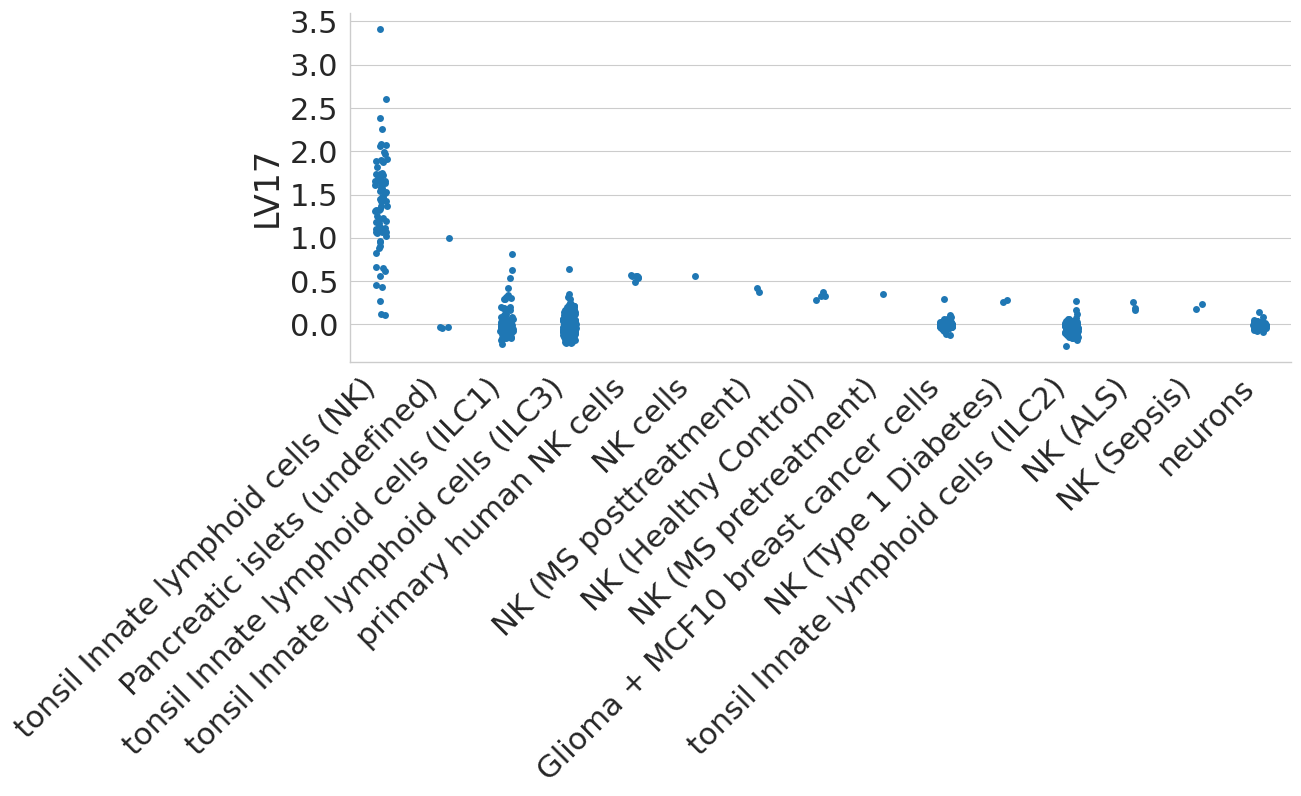

In [134]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [135]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [140]:
# with pd.option_context(
#     "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
# ):
#     _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("(NK)")].sort_values(LV_NAME, ascending=False)
#     display(_tmp.head(20))

In [141]:
# # what is there in these projects?
# _tmp = lv_data.loc[["SRP060416"]].dropna(how="all", axis=1).sort_values(
#     LV_NAME, ascending=False
# )

# display(_tmp.head(60))

In [143]:
# _tmp["facs gating"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )